In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
weather_data = pd.read_csv("weather-dataset/weatherHistory.csv")
weather_data.head(3)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [51]:
weather_data.describe(include=['O'])  #to exlppore the categorical columns in the data

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 10:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


In [52]:
weather_data.corr()
#Correlation varies between +1 to -1, +1 indicates
# strong positive correlation, Correlation coefficient of 
#-1 signifies perfect negative relationship, and correlation 
# of 0 means that no relationship exists between variables

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [53]:
# Let’s take all the relevant attributes into a new dataset and again check the correlation
data_set=weather_data.iloc[:,[0,3,4,5,8]]
data_set.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


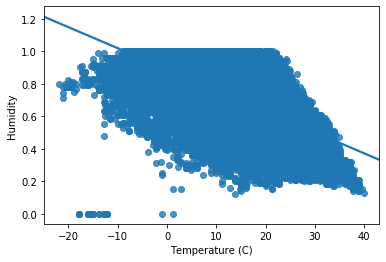

In [54]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"])
# Scatter plot between temp and humidity

In [55]:
import numpy as np
import pandas as pd
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [56]:
data_set_clean = data_set[data_set["Humidity"]>0.15]
data_set_clean.head()

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
0,2006-04-01 00:00:00.000 +0200,9.472222,7.388889,0.89,15.8263
1,2006-04-01 01:00:00.000 +0200,9.355556,7.227778,0.86,15.8263
2,2006-04-01 02:00:00.000 +0200,9.377778,9.377778,0.89,14.9569
3,2006-04-01 03:00:00.000 +0200,8.288889,5.944444,0.83,15.8263
4,2006-04-01 04:00:00.000 +0200,8.755556,6.977778,0.83,15.8263


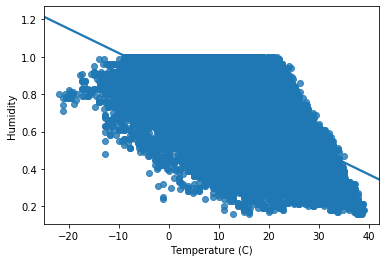

In [57]:
sns.regplot(x=data_set_clean["Temperature (C)"], y=data_set_clean["Humidity"])

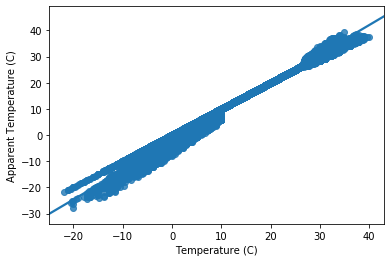

In [58]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Apparent Temperature (C)"])

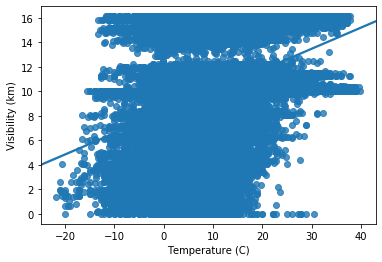

In [59]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Visibility (km)"])  #this means there is no strong relationship between temp and visibility

In [102]:
y= data_set_clean.iloc[:,[1]]
X= data_set_clean.iloc[:,[2,3,4]]


,Precip Type
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [61]:
weather_data["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [129]:
df = weather_data
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
for k in weather_data.iloc[:,2]:
    if(k==1):
        count
        print(k)
        print("times = {}".format(count))
        count=count+1

1
times = 1
1
times = 2
1
times = 3
1
times = 4
1
times = 5
1
times = 6
1
times = 7
1
times = 8
1
times = 9
1
times = 10
1
times = 11
1
times = 12
1
times = 13
1
times = 14
1
times = 15
1
times = 16
1
times = 17
1
times = 18
1
times = 19
1
times = 20
1
times = 21
1
times = 22
1
times = 23
1
times = 24
1
times = 25
1
times = 26
1
times = 27
1
times = 28
1
times = 29
1
times = 30
1
times = 31
1
times = 32
1
times = 33
1
times = 34
1
times = 35
1
times = 36
1
times = 37
1
times = 38
1
times = 39
1
times = 40
1
times = 41
1
times = 42
1
times = 43
1
times = 44
1
times = 45
1
times = 46
1
times = 47
1
times = 48
1
times = 49
1
times = 50
1
times = 51
1
times = 52
1
times = 53
1
times = 54
1
times = 55
1
times = 56
1
times = 57
1
times = 58
1
times = 59
1
times = 60
1
times = 61
1
times = 62
1
times = 63
1
times = 64
1
times = 65
1
times = 66
1
times = 67
1
times = 68
1
times = 69
1
times = 70
1
times = 71
1
times = 72
1
times = 73
1
times = 74
1
times = 75
1
times = 76
1
times = 77
1
times 

times = 1432
1
times = 1433
1
times = 1434
1
times = 1435
1
times = 1436
1
times = 1437
1
times = 1438
1
times = 1439
1
times = 1440
1
times = 1441
1
times = 1442
1
times = 1443
1
times = 1444
1
times = 1445
1
times = 1446
1
times = 1447
1
times = 1448
1
times = 1449
1
times = 1450
1
times = 1451
1
times = 1452
1
times = 1453
1
times = 1454
1
times = 1455
1
times = 1456
1
times = 1457
1
times = 1458
1
times = 1459
1
times = 1460
1
times = 1461
1
times = 1462
1
times = 1463
1
times = 1464
1
times = 1465
1
times = 1466
1
times = 1467
1
times = 1468
1
times = 1469
1
times = 1470
1
times = 1471
1
times = 1472
1
times = 1473
1
times = 1474
1
times = 1475
1
times = 1476
1
times = 1477
1
times = 1478
1
times = 1479
1
times = 1480
1
times = 1481
1
times = 1482
1
times = 1483
1
times = 1484
1
times = 1485
1
times = 1486
1
times = 1487
1
times = 1488
1
times = 1489
1
times = 1490
1
times = 1491
1
times = 1492
1
times = 1493
1
times = 1494
1
times = 1495
1
times = 1496
1
times = 1497
1
times = 14

times = 2177
1
times = 2178
1
times = 2179
1
times = 2180
1
times = 2181
1
times = 2182
1
times = 2183
1
times = 2184
1
times = 2185
1
times = 2186
1
times = 2187
1
times = 2188
1
times = 2189
1
times = 2190
1
times = 2191
1
times = 2192
1
times = 2193
1
times = 2194
1
times = 2195
1
times = 2196
1
times = 2197
1
times = 2198
1
times = 2199
1
times = 2200
1
times = 2201
1
times = 2202
1
times = 2203
1
times = 2204
1
times = 2205
1
times = 2206
1
times = 2207
1
times = 2208
1
times = 2209
1
times = 2210
1
times = 2211
1
times = 2212
1
times = 2213
1
times = 2214
1
times = 2215
1
times = 2216
1
times = 2217
1
times = 2218
1
times = 2219
1
times = 2220
1
times = 2221
1
times = 2222
1
times = 2223
1
times = 2224
1
times = 2225
1
times = 2226
1
times = 2227
1
times = 2228
1
times = 2229
1
times = 2230
1
times = 2231
1
times = 2232
1
times = 2233
1
times = 2234
1
times = 2235
1
times = 2236
1
times = 2237
1
times = 2238
1
times = 2239
1
times = 2240
1
times = 2241
1
times = 2242
1
times = 22

times = 3638
1
times = 3639
1
times = 3640
1
times = 3641
1
times = 3642
1
times = 3643
1
times = 3644
1
times = 3645
1
times = 3646
1
times = 3647
1
times = 3648
1
times = 3649
1
times = 3650
1
times = 3651
1
times = 3652
1
times = 3653
1
times = 3654
1
times = 3655
1
times = 3656
1
times = 3657
1
times = 3658
1
times = 3659
1
times = 3660
1
times = 3661
1
times = 3662
1
times = 3663
1
times = 3664
1
times = 3665
1
times = 3666
1
times = 3667
1
times = 3668
1
times = 3669
1
times = 3670
1
times = 3671
1
times = 3672
1
times = 3673
1
times = 3674
1
times = 3675
1
times = 3676
1
times = 3677
1
times = 3678
1
times = 3679
1
times = 3680
1
times = 3681
1
times = 3682
1
times = 3683
1
times = 3684
1
times = 3685
1
times = 3686
1
times = 3687
1
times = 3688
1
times = 3689
1
times = 3690
1
times = 3691
1
times = 3692
1
times = 3693
1
times = 3694
1
times = 3695
1
times = 3696
1
times = 3697
1
times = 3698
1
times = 3699
1
times = 3700
1
times = 3701
1
times = 3702
1
times = 3703
1
times = 37

1
times = 5069
1
times = 5070
1
times = 5071
1
times = 5072
1
times = 5073
1
times = 5074
1
times = 5075
1
times = 5076
1
times = 5077
1
times = 5078
1
times = 5079
1
times = 5080
1
times = 5081
1
times = 5082
1
times = 5083
1
times = 5084
1
times = 5085
1
times = 5086
1
times = 5087
1
times = 5088
1
times = 5089
1
times = 5090
1
times = 5091
1
times = 5092
1
times = 5093
1
times = 5094
1
times = 5095
1
times = 5096
1
times = 5097
1
times = 5098
1
times = 5099
1
times = 5100
1
times = 5101
1
times = 5102
1
times = 5103
1
times = 5104
1
times = 5105
1
times = 5106
1
times = 5107
1
times = 5108
1
times = 5109
1
times = 5110
1
times = 5111
1
times = 5112
1
times = 5113
1
times = 5114
1
times = 5115
1
times = 5116
1
times = 5117
1
times = 5118
1
times = 5119
1
times = 5120
1
times = 5121
1
times = 5122
1
times = 5123
1
times = 5124
1
times = 5125
1
times = 5126
1
times = 5127
1
times = 5128
1
times = 5129
1
times = 5130
1
times = 5131
1
times = 5132
1
times = 5133
1
times = 5134
1
times = 

1
times = 6444
1
times = 6445
1
times = 6446
1
times = 6447
1
times = 6448
1
times = 6449
1
times = 6450
1
times = 6451
1
times = 6452
1
times = 6453
1
times = 6454
1
times = 6455
1
times = 6456
1
times = 6457
1
times = 6458
1
times = 6459
1
times = 6460
1
times = 6461
1
times = 6462
1
times = 6463
1
times = 6464
1
times = 6465
1
times = 6466
1
times = 6467
1
times = 6468
1
times = 6469
1
times = 6470
1
times = 6471
1
times = 6472
1
times = 6473
1
times = 6474
1
times = 6475
1
times = 6476
1
times = 6477
1
times = 6478
1
times = 6479
1
times = 6480
1
times = 6481
1
times = 6482
1
times = 6483
1
times = 6484
1
times = 6485
1
times = 6486
1
times = 6487
1
times = 6488
1
times = 6489
1
times = 6490
1
times = 6491
1
times = 6492
1
times = 6493
1
times = 6494
1
times = 6495
1
times = 6496
1
times = 6497
1
times = 6498
1
times = 6499
1
times = 6500
1
times = 6501
1
times = 6502
1
times = 6503
1
times = 6504
1
times = 6505
1
times = 6506
1
times = 6507
1
times = 6508
1
times = 6509
1
times = 

1
times = 7824
1
times = 7825
1
times = 7826
1
times = 7827
1
times = 7828
1
times = 7829
1
times = 7830
1
times = 7831
1
times = 7832
1
times = 7833
1
times = 7834
1
times = 7835
1
times = 7836
1
times = 7837
1
times = 7838
1
times = 7839
1
times = 7840
1
times = 7841
1
times = 7842
1
times = 7843
1
times = 7844
1
times = 7845
1
times = 7846
1
times = 7847
1
times = 7848
1
times = 7849
1
times = 7850
1
times = 7851
1
times = 7852
1
times = 7853
1
times = 7854
1
times = 7855
1
times = 7856
1
times = 7857
1
times = 7858
1
times = 7859
1
times = 7860
1
times = 7861
1
times = 7862
1
times = 7863
1
times = 7864
1
times = 7865
1
times = 7866
1
times = 7867
1
times = 7868
1
times = 7869
1
times = 7870
1
times = 7871
1
times = 7872
1
times = 7873
1
times = 7874
1
times = 7875
1
times = 7876
1
times = 7877
1
times = 7878
1
times = 7879
1
times = 7880
1
times = 7881
1
times = 7882
1
times = 7883
1
times = 7884
1
times = 7885
1
times = 7886
1
times = 7887
1
times = 7888
1
times = 7889
1
times = 

1
times = 9186
1
times = 9187
1
times = 9188
1
times = 9189
1
times = 9190
1
times = 9191
1
times = 9192
1
times = 9193
1
times = 9194
1
times = 9195
1
times = 9196
1
times = 9197
1
times = 9198
1
times = 9199
1
times = 9200
1
times = 9201
1
times = 9202
1
times = 9203
1
times = 9204
1
times = 9205
1
times = 9206
1
times = 9207
1
times = 9208
1
times = 9209
1
times = 9210
1
times = 9211
1
times = 9212
1
times = 9213
1
times = 9214
1
times = 9215
1
times = 9216
1
times = 9217
1
times = 9218
1
times = 9219
1
times = 9220
1
times = 9221
1
times = 9222
1
times = 9223
1
times = 9224
1
times = 9225
1
times = 9226
1
times = 9227
1
times = 9228
1
times = 9229
1
times = 9230
1
times = 9231
1
times = 9232
1
times = 9233
1
times = 9234
1
times = 9235
1
times = 9236
1
times = 9237
1
times = 9238
1
times = 9239
1
times = 9240
1
times = 9241
1
times = 9242
1
times = 9243
1
times = 9244
1
times = 9245
1
times = 9246
1
times = 9247
1
times = 9248
1
times = 9249
1
times = 9250
1
times = 9251
1
times = 

1
times = 10196
1
times = 10197
1
times = 10198
1
times = 10199
1
times = 10200
1
times = 10201
1
times = 10202
1
times = 10203
1
times = 10204
1
times = 10205
1
times = 10206
1
times = 10207
1
times = 10208
1
times = 10209
1
times = 10210
1
times = 10211
1
times = 10212
1
times = 10213
1
times = 10214
1
times = 10215
1
times = 10216
1
times = 10217
1
times = 10218
1
times = 10219
1
times = 10220
1
times = 10221
1
times = 10222
1
times = 10223
1
times = 10224
1
times = 10225
1
times = 10226
1
times = 10227
1
times = 10228
1
times = 10229
1
times = 10230
1
times = 10231
1
times = 10232
1
times = 10233
1
times = 10234
1
times = 10235
1
times = 10236
1
times = 10237
1
times = 10238
1
times = 10239
1
times = 10240
1
times = 10241
1
times = 10242
1
times = 10243
1
times = 10244
1
times = 10245
1
times = 10246
1
times = 10247
1
times = 10248
1
times = 10249
1
times = 10250
1
times = 10251
1
times = 10252
1
times = 10253
1
times = 10254
1
times = 10255
1
times = 10256
1
times = 10257
1
times 

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
regressor.coef_


array([[ 0.85543641, -2.56652945,  0.01763988]])

In [136]:
regressor.intercept_    # temperature = 4.58 + (apparent temperature * 0.857) + (-2.648 * humidity)

array([4.35093913])

In [143]:
y_pred = regressor.predict(X_test)
last = pd.DataFrame(y_pred)
last

,0
0,15.056629
1,3.488923
2,25.644669
3,30.011212
4,25.213819
5,6.764627
6,12.768804
7,22.959684
8,-4.942276
9,13.048415


In [144]:
regressor.score(X,y)  #A value close to 1 for r² means a good fit.


0.987219419837431